# <u>Projet 6:Classifiez automatiquement des biens de consommation</u>

### <u>Sommaire</u>

- <a href ="#0"> Introduction</a>
- 1. <a href ="#1"> Importer les librairies et les données</a>
- 2. <a href ="#2"> Découvrir les données</a>
- 3.  <a href ="#3">Traitement du texte et définition des catégories</a>
    - 3.1.  <a href ="#31">Nettoyer le texte</a>
    - 3.2.  <a href ="#32">Création des bag-of-words pour créer les features  </a>
    - 3.3.  <a href ="#33">Réduire les composantes avec ACP  </a>
    - 3.4.  <a href ="#34">Réduire à 2 composantes avec TSNE et les présenter par catégorie réelle  </a>
    - 3.5.  <a href ="#35">Réduire à 2 composantes avec TSNE et les présenter par cluster  </a>
- 4.  <a href ="#4">Text embedding traitement du texte plus avancé</a>
    - 4.1.  <a href ="#41">Text embedding avec le modèle Word2Vec</a>
    - 4.2.  <a href ="#42">Text embedding avec le modèle BERT</a>
    - 4.3.  <a href ="#43">Text embedding avec le modèle USE</a>
- 5.  <a href ="#5">Traitement des images</a>
    - 5.1.  <a href ="#51">Avec l'algorithme SIFT</a>
    - 5.2.  <a href ="#52">Avec Transfer Learning</a>
- <a href ="#c"> Conclusion générale</a>

        
        
        


## <a name = "0">Introduction</a>

<div style="text-align: justify">
Dans ce projet, on va traiter des données textes et des images. Pour ce but, il faut par exemple préparer les textes, et les nettoyer. Apprendre comment créer des features à partir des données textes. Réduire les composantes à l'aide des modèles ACP et TSNE. Les mêmes étapes sont à refaire pour les données images.   
</div>

## <a name ="1">1. Importer les librairies et les données</a>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# pour préparer les données 'text'
import string
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')
# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

# pour créer des features bags of words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Pour réduire les composantes
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
 
# Modèle Word2Vec - Bert - USE
import gensim
#! pip install tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#! pip install transformers
from transformers import TFAutoModel
from transformers import AutoTokenizer
import time
# ! pip install tensorflow_hub
import tensorflow_hub as hub

# Traitement des images
# ! pip install opencv-python==4.6.0.66 
# ! pip install opencv-contrib-python==4.6.0.66 
import cv2 
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16
from keras.models import Model

In [3]:
data = pd.read_csv('./Flipkart/flipkart_com-ecommerce_sample_1050.csv') #Customers

In [3]:
data

uniq_id            crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1     7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2     64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3     d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4     6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
...                                ...                        ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43 +0000   
1046  fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43 +0000   
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1

In [5]:
data.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

## <a name ="2">2. Découvrir les données</a>

In [6]:
sentences = data['product_name']
for sentence in sentences:
    print(sentence)

Elegance Polyester Multicolor Abstract Eyelet Door Curtain
Sathiyas Cotton Bath Towel
Eurospa Cotton Terry Face Towel Set
SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet
Jaipur Print Cotton Floral King sized Double Bedsheet
Maserati Time R8851116001 Analog Watch  - For Boys
Camerii WM64 Elegance Analog Watch  - For Men, Boys
T STAR UFT-TSW-005-BK-BR Analog Watch  - For Boys
Alfajr WY16B Youth Digital Watch  - For Men, Boys
TAG Heuer CAU1116.BA0858 Formula 1 Analog Watch  - For Boys, Men
Calibro SW-125 Analog-Digital Watch  - For Men, Boys
Cartier W6701005 Analog Watch  - For Boys, Men
Lois Caron LCS-4032 Analog Watch  - For Boys, Men
Titan 1639SL03 Analog Watch  - For Boys, Men
Srushti Art Jewelry Megnet_Led_Sport_BlackRed1 Digital Watch  - For Men, Women, Boys, Girls
Escort E-1700-906_Blk Analog Watch  - For Men, Boys
Jack klein BlackLed Digital Watch  - For Boys
North Moon IW-005-FK Silicone Ion Digital Watch  - For Boys, Girls, Women
Franck Bella FB74C Analog Watch  

In [7]:
sentences = data['description']
for sentence in sentences:
    print(sentence)

Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you 

In [8]:
sentences = data['product_category_tree']
for sentence in sentences:
    print(sentence)

["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]
["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]
["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]
["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]
["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed..."]
["Watches >> Wrist Watches >> Maserati Time Wrist Watches"]
["Watches >> Wrist Watches >> Camerii Wrist Watches"]
["Watches >> Wrist Watches >> T STAR Wrist Watches"]
["Watches >> Wrist Watches >> Alfajr Wrist Watches"]
["Watches >> Wrist Watches >> TAG Heuer Wrist Watches"]
["Watches >> Wrist Watches >> Calibro Wrist Watches"]
["Watches >> Wrist 

## <a name ="3">3. Traitement du texte et définition des catégories</a>

### <a name ="31">3.1. Nettoyer le texte</a>

<div style="text-align: justify">
Pour appliquer les données textes sur les modèles CountVectorizer() ou TfidfVectorizer(), il faut nettoyer le texte et le préparer. C'est pour cela, la fonction clean_text() va préparer le texte par phrase (sentence). D'abord, pour enlever les ponctuations j'ai ajouté les deux ponctuations ['�','x'] au string.punctuation. Car je les ai trouvées dans le text et elles ne sont pas inclues dans string.punctuation. Les mots qui n'ont pas d'intérêt vont être enlevés à l'aide de stopwords comme (i, me, my, ...). Ensuite, word_tokenize pour séparer la phrase aux mots. C'est à dire, au lieu d'avoir la phrase comme un seul élément dans la liste, on va avoir plusieurs éléments représentent chaque mot dans la liste. A la fin, utiliser lemmatizer permet d'avoir la base du mot.
</div>

In [6]:
def clean_text(sentence: str):
    '''_Use the function clean_text() to obtain the clean sentence_.
    Args:
        sentence (str, optional): _Put the sentence which you want to clean_. 
                    
    Returns:
        lem_w: _The cleaned sentence_.
    '''
    punctuations = list(string.punctuation)+['�','x']
    stop_words = stopwords.words('english')
    for p in punctuations :
        sentence = sentence.replace(p, ' ')
    sentence_clean = sentence
    word_tokens = word_tokenize(sentence_clean)
    filtered_w = [w for w in word_tokens if not w in stop_words]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    lw = [w.lower() for w in filtered_w2]
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in lw]
    return lem_w

#### Exemple

In [7]:
sentence = data['description'][500]
sentence

'Nexus NX_7668 Analog Watch  - For Men - Buy Nexus NX_7668 Analog Watch  - For Men  NX_7668 Online at Rs.999 in India Only at Flipkart.com. - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!'

In [8]:
clean_text(sentence)

['7668',
 'analog',
 'watch',
 'for',
 'men',
 'buy',
 '7668',
 'analog',
 'watch',
 'for',
 'men',
 '7668',
 'online',
 '999',
 'india',
 'only',
 'flipkart',
 'com',
 'great',
 'discount',
 'only',
 'genuine',
 'product',
 'day',
 'replacement',
 'guarantee',
 'free',
 'shipping',
 'cash',
 'delivery']

### <a name ="32">3.2. Création des bag-of-words pour créer les features  </a>

<div style="text-align: justify">
Le but est de créer des features pour les données textes et c'est en utilisant les modèles countvectorizer et tfidvectorizer. Grace à ces modèles, on obtient la feature pour chaque mot.
</div>

### <u>Modèle countvectorizer</u>

In [67]:
def get_feature_countvectorizer(corpus: object):
    '''_Use the function get_feature_countvectorizer() to obtain the features from sentences_.
    Args:
        corpus (object, optional): _Put the sentences which you want to get features from_. 
        
    Returns:
        features: _The features created by words_.
    '''
    vectorizer = CountVectorizer()
    corpus = corpus.apply(lambda sentence: ' '.join(clean_text(sentence)))
    X = vectorizer.fit_transform(corpus)
    features = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    return features

#### Exemples

In [68]:
corpus = data['product_name']
get_feature_countvectorizer(corpus)

001  005  006  008  011  01433cmgy  01727lpln  01741lpln  01784bmly  \
0       0    0    0    0    0          0          0          0          0   
1       0    0    0    0    0          0          0          0          0   
2       0    0    0    0    0          0          0          0          0   
3       0    0    0    0    0          0          0          0          0   
4       0    0    0    0    0          0          0          0          0   
...   ...  ...  ...  ...  ...        ...        ...        ...        ...   
1045    0    0    0    0    0          0          0          0          0   
1046    0    0    0    0    0          0          0          0          0   
1047    0    0    0    0    0          0          0          0          0   
1048    0    0    0    0    0          0          0          0          0   
1049    0    0    0    0    0          0          0          0          0   

      03918cmly  ...  yourself  youth  yuva  yves  zaicus  zero  zikrak  \
0             0  ...         0      0     0     0       0     0       0   
1             0  ...         0      0     0     0       0     0       0   
2             0  ...         0      0     0     0       0     0       0   
3             0  ...         0      0     0     0       0     0       0   
4             0  ...         0      0     0     0       0     0       0   
...         ...  ...       ...    ...   ...   ...     ...   ...     ...   
1045          0  ...         0      0     0     0       0     0       0   
1046          0  ...         0      0     0     0       0     0       0   
1047          0  ...         0      0     0     0       0     0       0   
1048          0  ...         0      0     0     0       0     0       0   
1049          0  ...         0      0     0     0       0     0       0   

      zingalalaa  zone  zora  
0              0     0     0  
1              0     0     0  
2              0     0     0  
3              0     0     0  
4              0     0     0  
...          ...   ...   ...  
1045           0     0     0  
1046           0     0     0  
1047           0     0     0  
1048           0     0     0  
1049           0     0     0  

[1050 rows x 2135 columns]

In [45]:
corpus = data['description']
get_feature_countvectorizer(corpus)

000  001  0021  004  005  006  008  0083  011  01433cmgy  ...  zikrak  \
0       0    0     0    0    0    0    0     0    0          0  ...       0   
1       0    0     0    0    0    0    0     0    0          0  ...       0   
2       0    0     0    0    0    0    0     0    0          0  ...       0   
3       0    0     0    0    0    0    0     0    0          0  ...       0   
4       0    0     0    0    0    0    0     0    0          0  ...       0   
...   ...  ...   ...  ...  ...  ...  ...   ...  ...        ...  ...     ...   
1045    0    0     0    0    0    0    0     0    0          0  ...       0   
1046    0    0     0    0    0    0    0     0    0          0  ...       0   
1047    0    0     0    0    0    0    0     0    0          0  ...       0   
1048    0    0     0    0    0    0    0     0    0          0  ...       0   
1049    0    0     0    0    0    0    0     0    0          0  ...       0   

      zinc  zingalalaa  zip  zipe  zipper  zippered  zone  zoom  zora  
0        0           0    0     0       0         0     0     0     0  
1        0           0    0     0       0         0     0     0     0  
2        0           0    0     0       0         0     0     0     0  
3        0           0    0     0       0         0     0     0     0  
4        0           0    0     0       0         0     0     0     0  
...    ...         ...  ...   ...     ...       ...   ...   ...   ...  
1045     0           0    0     0       0         0     0     0     0  
1046     0           0    0     0       0         0     0     0     0  
1047     0           0    0     0       0         0     0     0     0  
1048     0           0    0     0       0         0     0     0     0  
1049     0           0    0     0       0         0     0     0     0  

[1050 rows x 5363 columns]

In [46]:
corpus = data['product_name'] + data['description']
get_feature_countvectorizer(corpus)

000  001  0021  004  005  006  008  0083  011  01433cmgy  ...  zikrak  \
0       0    0     0    0    0    0    0     0    0          0  ...       0   
1       0    0     0    0    0    0    0     0    0          0  ...       0   
2       0    0     0    0    0    0    0     0    0          0  ...       0   
3       0    0     0    0    0    0    0     0    0          0  ...       0   
4       0    0     0    0    0    0    0     0    0          0  ...       0   
...   ...  ...   ...  ...  ...  ...  ...   ...  ...        ...  ...     ...   
1045    0    0     0    0    0    0    0     0    0          0  ...       0   
1046    0    0     0    0    0    0    0     0    0          0  ...       0   
1047    0    0     0    0    0    0    0     0    0          0  ...       0   
1048    0    0     0    0    0    0    0     0    0          0  ...       0   
1049    0    0     0    0    0    0    0     0    0          0  ...       0   

      zinc  zingalalaa  zip  zipe  zipper  zippered  zone  zoom  zora  
0        0           0    0     0       0         0     0     0     0  
1        0           0    0     0       0         0     0     0     0  
2        0           0    0     0       0         0     0     0     0  
3        0           0    0     0       0         0     0     0     0  
4        0           0    0     0       0         0     0     0     0  
...    ...         ...  ...   ...     ...       ...   ...   ...   ...  
1045     0           0    0     0       0         0     0     0     0  
1046     0           0    0     0       0         0     0     0     0  
1047     0           0    0     0       0         0     0     0     0  
1048     0           0    0     0       0         0     0     0     0  
1049     0           0    0     0       0         0     0     0     0  

[1050 rows x 5814 columns]

### <u>Modèle tfidvectorizer</u>

In [18]:
def get_feature_tfidvectorizer(corpus: object):
    '''_Use the function get_feature_tfidvectorizer() to obtain the features from sentences_.
    Args:
        corpus (object, optional): _Put the sentences which you want to get features from_.              
    
    Returns:
        features: _The features created by words_.
    '''
    vectorizer = TfidfVectorizer()    
    corpus = corpus.apply(lambda sentence: ' '.join(clean_text(sentence)))
    X = vectorizer.fit_transform(corpus)
    features = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    return features

#### Exemples

In [48]:
corpus = data['product_name']
get_feature_tfidvectorizer(corpus)

001  005  006  008  011  01433cmgy  01727lpln  01741lpln  01784bmly  \
0     0.0  0.0  0.0  0.0  0.0        0.0        0.0        0.0        0.0   
1     0.0  0.0  0.0  0.0  0.0        0.0        0.0        0.0        0.0   
2     0.0  0.0  0.0  0.0  0.0        0.0        0.0        0.0        0.0   
3     0.0  0.0  0.0  0.0  0.0        0.0        0.0        0.0        0.0   
4     0.0  0.0  0.0  0.0  0.0        0.0        0.0        0.0        0.0   
...   ...  ...  ...  ...  ...        ...        ...        ...        ...   
1045  0.0  0.0  0.0  0.0  0.0        0.0        0.0        0.0        0.0   
1046  0.0  0.0  0.0  0.0  0.0        0.0        0.0        0.0        0.0   
1047  0.0  0.0  0.0  0.0  0.0        0.0        0.0        0.0        0.0   
1048  0.0  0.0  0.0  0.0  0.0        0.0        0.0        0.0        0.0   
1049  0.0  0.0  0.0  0.0  0.0        0.0        0.0        0.0        0.0   

      03918cmly  ...  yourself  youth  yuva  yves  zaicus  zero  zikrak  \
0           0.0  ...       0.0    0.0   0.0   0.0     0.0   0.0     0.0   
1           0.0  ...       0.0    0.0   0.0   0.0     0.0   0.0     0.0   
2           0.0  ...       0.0    0.0   0.0   0.0     0.0   0.0     0.0   
3           0.0  ...       0.0    0.0   0.0   0.0     0.0   0.0     0.0   
4           0.0  ...       0.0    0.0   0.0   0.0     0.0   0.0     0.0   
...         ...  ...       ...    ...   ...   ...     ...   ...     ...   
1045        0.0  ...       0.0    0.0   0.0   0.0     0.0   0.0     0.0   
1046        0.0  ...       0.0    0.0   0.0   0.0     0.0   0.0     0.0   
1047        0.0  ...       0.0    0.0   0.0   0.0     0.0   0.0     0.0   
1048        0.0  ...       0.0    0.0   0.0   0.0     0.0   0.0     0.0   
1049        0.0  ...       0.0    0.0   0.0   0.0     0.0   0.0     0.0   

      zingalalaa  zone  zora  
0            0.0   0.0   0.0  
1            0.0   0.0   0.0  
2            0.0   0.0   0.0  
3            0.0   0.0   0.0  
4            0.0   0.0   0.0  
...          ...   ...   ...  
1045         0.0   0.0   0.0  
1046         0.0   0.0   0.0  
1047         0.0   0.0   0.0  
1048         0.0   0.0   0.0  
1049         0.0   0.0   0.0  

[1050 rows x 2135 columns]

In [49]:
corpus = data['description']
get_feature_tfidvectorizer(corpus)

000  001  0021  004  005  006  008  0083  011  01433cmgy  ...  zikrak  \
0     0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0        0.0  ...     0.0   
1     0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0        0.0  ...     0.0   
2     0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0        0.0  ...     0.0   
3     0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0        0.0  ...     0.0   
4     0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0        0.0  ...     0.0   
...   ...  ...   ...  ...  ...  ...  ...   ...  ...        ...  ...     ...   
1045  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0        0.0  ...     0.0   
1046  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0        0.0  ...     0.0   
1047  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0        0.0  ...     0.0   
1048  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0        0.0  ...     0.0   
1049  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0        0.0  ...     0.0   

      zinc  zingalalaa  zip  zipe  zipper  zippered  zone  zoom  zora  
0      0.0         0.0  0.0   0.0     0.0       0.0   0.0   0.0   0.0  
1      0.0         0.0  0.0   0.0     0.0       0.0   0.0   0.0   0.0  
2      0.0         0.0  0.0   0.0     0.0       0.0   0.0   0.0   0.0  
3      0.0         0.0  0.0   0.0     0.0       0.0   0.0   0.0   0.0  
4      0.0         0.0  0.0   0.0     0.0       0.0   0.0   0.0   0.0  
...    ...         ...  ...   ...     ...       ...   ...   ...   ...  
1045   0.0         0.0  0.0   0.0     0.0       0.0   0.0   0.0   0.0  
1046   0.0         0.0  0.0   0.0     0.0       0.0   0.0   0.0   0.0  
1047   0.0         0.0  0.0   0.0     0.0       0.0   0.0   0.0   0.0  
1048   0.0         0.0  0.0   0.0     0.0       0.0   0.0   0.0   0.0  
1049   0.0         0.0  0.0   0.0     0.0       0.0   0.0   0.0   0.0  

[1050 rows x 5363 columns]

In [50]:
corpus = data['product_name'] + data['description']
get_feature_tfidvectorizer(corpus)

000  001  0021  004  005  006  008  0083  011  01433cmgy  ...  zikrak  \
0     0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0        0.0  ...     0.0   
1     0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0        0.0  ...     0.0   
2     0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0        0.0  ...     0.0   
3     0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0        0.0  ...     0.0   
4     0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0        0.0  ...     0.0   
...   ...  ...   ...  ...  ...  ...  ...   ...  ...        ...  ...     ...   
1045  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0        0.0  ...     0.0   
1046  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0        0.0  ...     0.0   
1047  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0        0.0  ...     0.0   
1048  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0        0.0  ...     0.0   
1049  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0        0.0  ...     0.0   

      zinc  zingalalaa  zip  zipe  zipper  zippered  zone  zoom  zora  
0      0.0         0.0  0.0   0.0     0.0       0.0   0.0   0.0   0.0  
1      0.0         0.0  0.0   0.0     0.0       0.0   0.0   0.0   0.0  
2      0.0         0.0  0.0   0.0     0.0       0.0   0.0   0.0   0.0  
3      0.0         0.0  0.0   0.0     0.0       0.0   0.0   0.0   0.0  
4      0.0         0.0  0.0   0.0     0.0       0.0   0.0   0.0   0.0  
...    ...         ...  ...   ...     ...       ...   ...   ...   ...  
1045   0.0         0.0  0.0   0.0     0.0       0.0   0.0   0.0   0.0  
1046   0.0         0.0  0.0   0.0     0.0       0.0   0.0   0.0   0.0  
1047   0.0         0.0  0.0   0.0     0.0       0.0   0.0   0.0   0.0  
1048   0.0         0.0  0.0   0.0     0.0       0.0   0.0   0.0   0.0  
1049   0.0         0.0  0.0   0.0     0.0       0.0   0.0   0.0   0.0  

[1050 rows x 5814 columns]

<div style="text-align: justify">
On remarque que le nombre de colonne est entre 2000 et 6000. Donc, on a un grand nombre de features. Pour faciliter l'analyse pour la suite, il est mieux de réduire ce nombre.
</div>

### <a name ="33">3.3. Réduire les composantes avec ACP </a>

<div style="text-align: justify">
La fonction transform_features_pca() réduit les composantes de features en gardant un pourcentage de variance expliquée de 80%.  
</div>

In [3]:
def transform_features_pca(features: object, step_components: int =10):
    '''_Use the function transform_features_pca() to obtain the reduced features with pca method. The results obtained keep 
            the explained variance value more than 80%_.
    Args:
        features (object, optional): _Put the feature which you want to reduce_.   
        step_components (int, optional): _Choose the step value of  number_components. This step will also be taked like 
                                              the first value of number_components. Small value to better precision, 
                                              and big value to faster results_. Default to 10.

    Returns:
        features_pca: _The features reduced by pca_.
    '''
    explained_variance = 0
    step_components = step_components
    number_components = step_components
    while explained_variance < 0.8:
        pca = PCA(n_components=number_components)
        features_pca = pca.fit_transform(features)
        explained_variance = sum(pca.explained_variance_)
        number_components += step_components
    number_components -= step_components
    columns_index = ['PC'+str(i) for i in range(number_components)]
    features_pca = pd.DataFrame(features_pca, columns=columns_index)
    return features_pca

#### Exemples

In [21]:
features = get_feature_tfidvectorizer(corpus=data['product_name']+data['description'])

In [11]:
features.shape

(1050, 5814)

In [25]:
features_pca = transform_features_pca(features)

In [26]:
features_pca.shape

(1050, 510)

<div style="text-align: justify">
On a réduit le nombre de composantes de 5814 à 510. Si on calcule la variance expliquée, elle ne va pas être moins de 80%.
</div>

In [27]:
features_pca

PC0       PC1       PC2       PC3       PC4       PC5       PC6  \
0     0.087172 -0.085243 -0.041018 -0.115402  0.027135  0.179481  0.082756   
1     0.062049 -0.157665  0.039797 -0.018019 -0.011056  0.037561  0.062187   
2     0.070507 -0.136573 -0.000889 -0.013982 -0.041006 -0.015509  0.084605   
3     0.076298 -0.153095 -0.002424 -0.055913  0.029542  0.135275  0.096736   
4     0.090154 -0.156319 -0.021952 -0.069887  0.021583  0.152368  0.135399   
...        ...       ...       ...       ...       ...       ...       ...   
1045  0.043285 -0.042735 -0.043917 -0.104681 -0.045534  0.048009 -0.025470   
1046  0.093238 -0.025850 -0.049197 -0.125571 -0.049580  0.057366  0.012239   
1047 -0.010601 -0.006518 -0.061807 -0.028918 -0.027787 -0.001386 -0.058061   
1048 -0.019728 -0.002083 -0.089055 -0.041294 -0.050780  0.000564 -0.081864   
1049 -0.028200  0.006598 -0.085318 -0.022795 -0.038430 -0.010739 -0.071873   

           PC7       PC8       PC9  ...     PC500     PC501     PC502  \
0    -0.261974  0.133536 -0.314581  ... -0.029538 -0.005591  0.027593   
1    -0.264509  0.164499  0.490842  ...  0.005167  0.012641  0.004031   
2    -0.216056  0.108008  0.409718  ... -0.004815  0.008237 -0.033632   
3    -0.146489  0.026604  0.113153  ... -0.016074  0.005100  0.006144   
4    -0.146634  0.010914  0.131127  ...  0.009113 -0.036309 -0.022740   
...        ...       ...       ...  ...       ...       ...       ...   
1045 -0.043814 -0.020824 -0.010845  ...  0.040343 -0.017561  0.016206   
1046 -0.062689 -0.032841 -0.010189  ...  0.029147  0.017838  0.049970   
1047 -0.001486 -0.006879 -0.000989  ...  0.001388 -0.033823 -0.010052   
1048 -0.021645 -0.022674 -0.006655  ... -0.023739 -0.000489  0.005773   
1049 -0.001394 -0.023034 -0.001991  ...  0.003593  0.035430 -0.004670   

         PC503     PC504     PC505     PC506     PC507     PC508     PC509  
0     0.032192 -0.011568 -0.001445  0.035824 -0.030636  0.003318 -0.037251  
1     0.033936  0.018428  0.035577  0.012301 -0.016849  0.002092  0.000719  
2     0.013566  0.002399  0.003027 -0.015775  0.026130 -0.023812 -0.032455  
3    -0.002639 -0.019895  0.010755 -0.009652 -0.025389 -0.016055 -0.016340  
4     0.010020  0.012808 -0.003540 -0.004218 -0.012102  0.019035  0.012381  
...        ...       ...       ...       ...       ...       ...       ...  
1045  0.014102  0.012150 -0.019218  0.004009  0.033052  0.085420  0.000468  
1046 -0.011938  0.016880 -0.021201 -0.021824  0.006470  0.007649 -0.006246  
1047 -0.044114 -0.011977  0.022721 -0.022280  0.002492 -0.001000  0.002186  
1048  0.001834 -0.003531  0.003295 -0.000709 -0.007025 -0.000944 -0.009246  
1049  0.029853  0.009997 -0.021267  0.033239 -0.012022 -0.010811 -0.000301  

[1050 rows x 510 columns]

### <a name ="34">3.4. Réduire à 2 composantes avec TSNE et les présenter par catégorie réelle </a>

<div style="text-align: justify">
La fonction visu_tsne() réduit les composantes à deux avec le modèle TSNE. Ensuite, elle représente ces deux composantes par leurs catégories réelles. La catégorie réelle est la première catégorie dans la colonne data['product_category_tree'].
</div>

In [4]:
def visu_tsne(features: object):
    '''_Use the function visu_tsne() to obtain the visualisation by real category of reduced features with TSNE method_.
    Args:
        features (object, optional): _Put the feature which you want to visualise_.   
    
    Returns:
        plt.show(): _A plot of 'Visualization by real category of reduced features with TSNE'_.
    '''
    model = TSNE(n_components=2, learning_rate='auto', init='random')
    features_tsne = model.fit_transform(features)
    # Catégories réelles 
    punctuations = ['[', ']', '"']
    real_categories = []
    for sentence in data['product_category_tree']:
        for p in punctuations :
            sentence = sentence.replace(p, ' ')
        real_categories.append(sentence.split('>>')[0].strip())
    real_categories_unique = pd.Series(real_categories).unique()
    # Catégories codes  
    categories_codes = pd.Series(range(len(real_categories_unique)), index=real_categories_unique).to_dict()
    real_category_codes = [categories_codes[cat] for cat in real_categories]
    
    X0 = features_tsne[:, 0]
    X1 = features_tsne[:, 1]
    categories_labels = list(real_categories_unique)
    fig, ax = plt.subplots(figsize=(15, 6))
    scatter = ax.scatter(X0, X1, c=real_category_codes, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=categories_labels, loc="best", title="Category")
    plt.title('Visualization by real category of reduced features with TSNE', size=18)
    return plt.show()

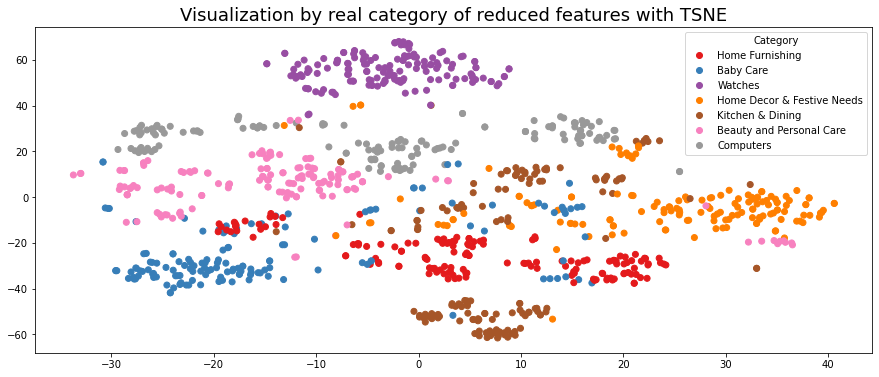

In [30]:
visu_tsne(features)

### <a name ="35">3.5. Réduire à 2 composantes avec TSNE et les présenter par cluster </a>

<div style="text-align: justify">
La fonction def visu_tsne_kmeans() réduit les composantes à deux avec le modèle TSNE. Ensuite, appliquer les deux composantes sur un modèle KMeans afin d'obtenir les clusters et présenter les composantes par cluster.
</div>

In [5]:
def visu_tsne_kmeans(features: object):
    '''_Use the function visu_tsne_kmeans() to obtain the visualisation by KMeans clusters of reduced features with TSNE 
            method_.
    Args:
        features (object, optional): _Put the feature which you want to visualise_.   
   
    Returns:
        plt.show(): _A plot of 'Visualization by by KMeans clusters of reduced features with TSNE'_.
        print_ari_score: _The ARI score to see the similarity between the real category codes and clusters labels.
    '''
    model = TSNE(n_components=2, learning_rate='auto', init='random')
    features_tsne = model.fit_transform(features)
    # Catégories réelles 
    punctuations = ['[', ']', '"']
    real_categories = []
    for sentence in data['product_category_tree']:
        for p in punctuations :
            sentence = sentence.replace(p, ' ')
        real_categories.append(sentence.split('>>')[0].strip())
    real_categories_unique = pd.Series(real_categories).unique()
    # Appliquer le modèle KMeans 
    kmeans = KMeans(n_clusters=len(real_categories_unique)).fit(features_tsne)
    # Catégories codes  
    categories_codes = pd.Series(range(len(real_categories_unique)), index=real_categories_unique).to_dict()
    real_category_codes = [categories_codes[cat] for cat in real_categories]
    
    X0 = features_tsne[:, 0]
    X1 = features_tsne[:, 1]    
    clusters_labels = kmeans.labels_
    clusters_labels_list = list(pd.Series(clusters_labels).sort_values().unique())
    fig, ax = plt.subplots(figsize=(15, 6))
    scatter = ax.scatter(X0, X1, c=clusters_labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=clusters_labels_list, loc="best", title="Cluster")
    plt.title('Visualization of reduced features with TSNE by KMeans clusters', size=18)
    ari_score = adjusted_rand_score(real_category_codes, clusters_labels)
    print_ari_score = print('ARIScore(Category, Clusters) = '+str(round(ari_score, 3)))
    return plt.show(), print_ari_score

ARIScore(Category, Clusters) = 0.44


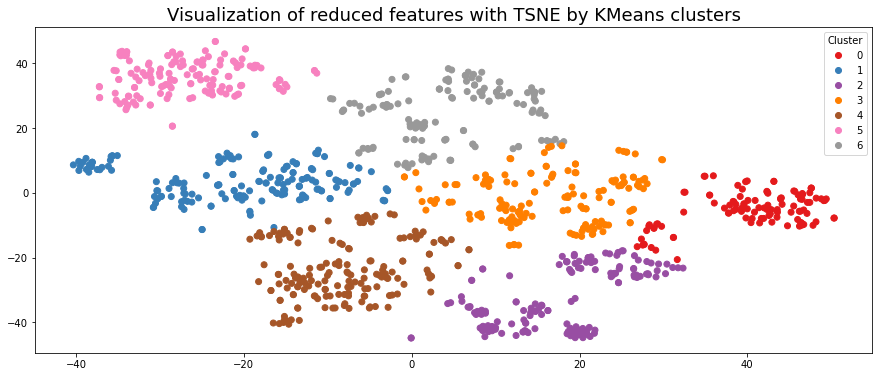

In [31]:
visu_tsne_kmeans(features);

## <a name ="4">4. Text embedding traitement du texte plus avancé</a>

### <a name ="41">4.1. Text embedding avec le modèle Word2Vec</a>

<div style="text-align: justify">
Les étapes suivies sont les étapes proposées par OpenClassroom par le notebook : <a href=  https://s3.eu-west-1.amazonaws.com/course.oc-static.com/projects/Data_Scientist_P6/Exemple_Tweets_Feature-extraction_Sentence+Embedding_V1.1.ipynb > Exemple_Tweets_Feature-extraction_Sentence+Embedding_V1.1 </a>. Le but est d'obtenir la matrice embedding du texte, et l'utiliser pour avoir la visualisation TSNE par catégorie réelle et par cluster.
</div>

In [13]:
w2v_window=5
w2v_min_count=1
w2v_epochs=100
sentences = (data['product_name']+data['description']).to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]
w2v_size=len(sentences)

In [14]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)

w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 5542
Word2Vec trained


In [15]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) # + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 5542


In [16]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = len(sentences)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (5543, 1050)


In [17]:
pd.DataFrame(embedding_matrix.T)

0         1         2         3         4         5         6     \
0      0.0 -0.792954  0.130366  0.094485  0.396988 -0.710730  0.065170   
1      0.0  0.171793 -0.277417 -0.083322 -0.183550 -0.432834 -0.025987   
2      0.0  0.209257 -0.004637 -0.093027  0.054116  0.903402 -0.389654   
3      0.0  0.047069  0.634508 -0.819835  0.134522  0.281515 -0.101677   
4      0.0 -0.300579 -0.427468  0.171921  0.224523  0.063371 -0.017924   
...    ...       ...       ...       ...       ...       ...       ...   
1045   0.0 -0.534132 -0.624592  0.201483  0.208736  0.193243 -0.454580   
1046   0.0 -0.797478  0.721416 -0.095437 -0.519280 -0.260958  0.073405   
1047   0.0 -0.201849  0.629010  0.491893 -0.474163 -0.225242  0.238225   
1048   0.0  0.486622 -0.064867  0.449811  0.952185 -0.284971  0.755826   
1049   0.0 -0.013606 -0.560056 -0.423617 -0.760980 -0.380649  0.181391   

          7         8         9     ...      5533      5534      5535  \
0    -0.213908 -0.135770  0.045801  ...  0.005851 -0.017241 -0.019692   
1    -0.074062  1.311303  0.831447  ... -0.063892 -0.095204 -0.107449   
2     0.548198 -0.105576  0.439281  ... -0.159429  0.044572 -0.028188   
3     0.893231 -0.052999  0.713722  ... -0.056073  0.055235 -0.044872   
4     0.022225 -0.451802  0.135007  ...  0.109598  0.021599  0.065843   
...        ...       ...       ...  ...       ...       ...       ...   
1045 -1.662205  0.290199 -0.259485  ...  0.016308 -0.079788 -0.043260   
1046  0.414948 -0.524120  1.587488  ...  0.065869 -0.135453 -0.129976   
1047 -1.466354 -0.094984 -0.027956  ... -0.027474 -0.032911  0.043310   
1048 -0.014825  0.805253 -0.447405  ... -0.000665  0.109126  0.102943   
1049 -0.509334 -0.772508 -0.543424  ... -0.073408 -0.015468 -0.102789   

          5536      5537      5538      5539      5540      5541      5542  
0    -0.004228 -0.002282  0.063062  0.034154 -0.116638  0.036589  0.047745  
1    -0.060348 -0.072685 -0.066122 -0.047415 -0.093466 -0.034102 -0.054821  
2     0.068051  0.159861  0.122485 -0.022399  0.012660 -0.034422 -0.059657  
3    -0.044987  0.023127  0.103293 -0.058096  0.032487  0.018436  0.029513  
4     0.055699  0.032332 -0.021636  0.141825  0.011493  0.042733  0.065702  
...        ...       ...       ...       ...       ...       ...       ...  
1045 -0.012355 -0.015231 -0.040123  0.007867 -0.073607 -0.023092 -0.033724  
1046 -0.071650 -0.031118  0.009156  0.062738 -0.185857 -0.004002 -0.015319  
1047  0.051317 -0.010583 -0.039524 -0.122711 -0.025573  0.018301  0.032082  
1048  0.033099 -0.027513  0.048435  0.043908  0.004548  0.050745  0.080422  
1049  0.046256  0.165220  0.115972 -0.163603 -0.041946 -0.048563 -0.087793  

[1050 rows x 5543 columns]

<div style="text-align: justify">
 Le cas de l'approche Word2Vec : 

</div>

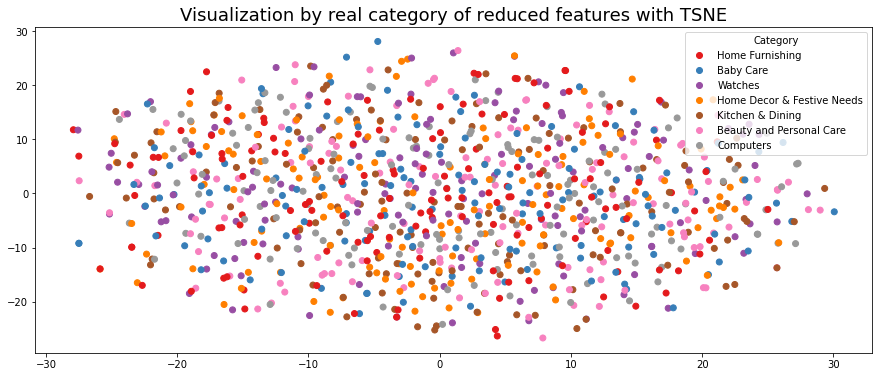

In [74]:
visu_tsne(embedding_matrix.T)

ARIScore(Category, Clusters) = 0.001


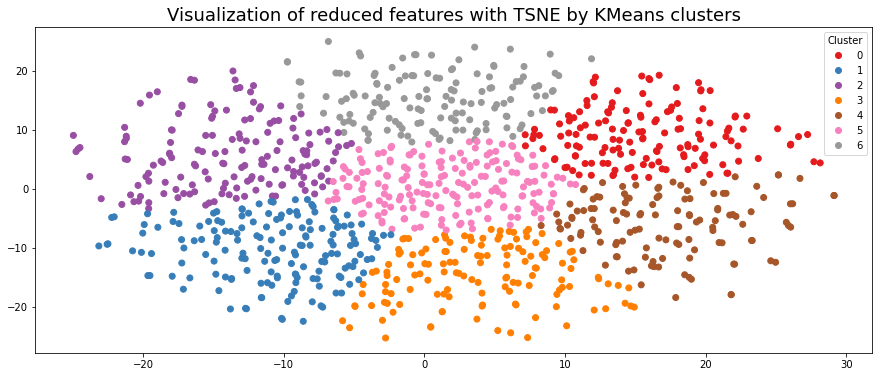

In [75]:
visu_tsne_kmeans(embedding_matrix.T);

<div style="text-align: justify">
Le cas précédent_les résultats obtenus dans le  paragraphe 3 : 

</div>

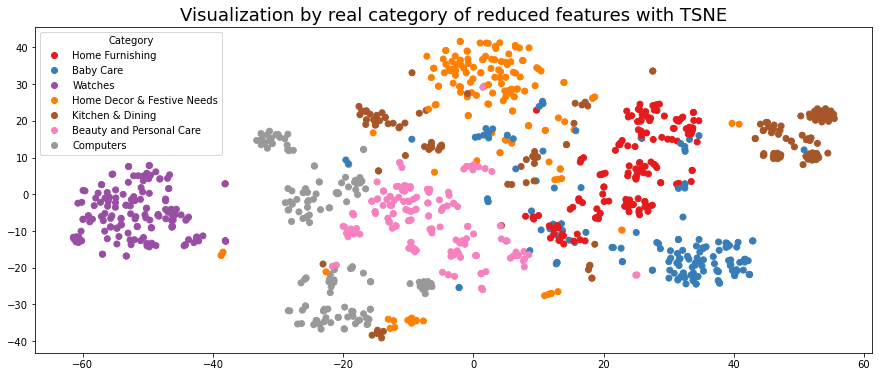

In [101]:
visu_tsne(features)

ARIScore(Category, Clusters) = 0.416


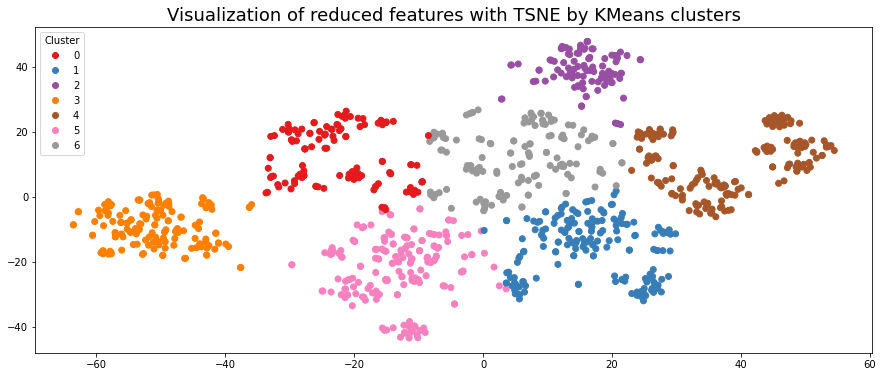

In [102]:
visu_tsne_kmeans(features);

<div style="text-align: justify">
<u>La visualisation par catégorie réelle</u> Avec l'approche Word2Vec les données sont très dispersées, et elles ne sont pas regroupés comme le cas précédent.<br>
<u>La visualisation par clusters</u> Avec l'approche Word2Vec les clusters sont mieux regroupés et la distance entre les cluster a diminué. ARI score est très faible d'une valeur 0.001.
    
</div>

### <a name ="42">4.2. Text embedding avec le modèle BERT</a>

<div style="text-align: justify">
Les étapes suivies sont les étapes proposées par OpenClassroom par le notebook : <a href=  https://s3.eu-west-1.amazonaws.com/course.oc-static.com/projects/Data_Scientist_P6/Exemple_Tweets_Feature-extraction_Sentence+Embedding_V1.1.ipynb > Exemple_Tweets_Feature-extraction_Sentence+Embedding_V1.1 </a>. Le but est d'obtenir la matrice embedding du texte, et l'utiliser pour avoir la visualisation TSNE par catégorie réelle et par cluster.
</div>

In [77]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

###  <u>BERT HuggingFace</u>

#### - 'bert-base-uncased'

In [78]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = (data['product_name']+data['description']).to_list()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [79]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

1/1 [==============================] - 1s 1s/step
temps traitement :  153.0


In [80]:
features_bert.shape

(1050, 768)

<div style="text-align: justify">
 Le cas de l'approche BERT : 

</div>

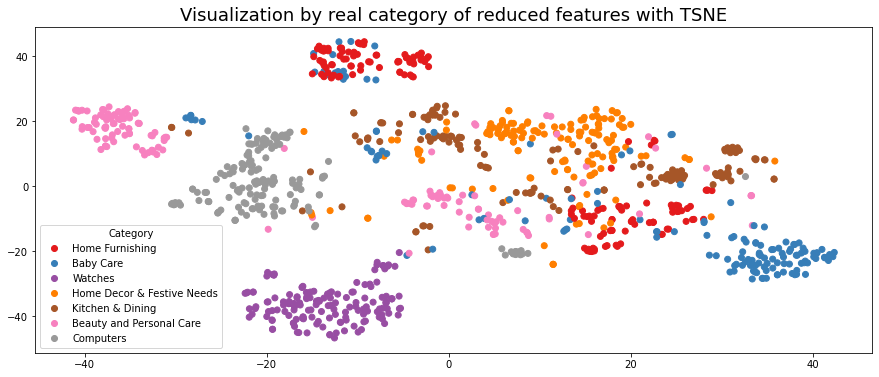

In [81]:
visu_tsne(features_bert)

ARIScore(Category, Clusters) = 0.474


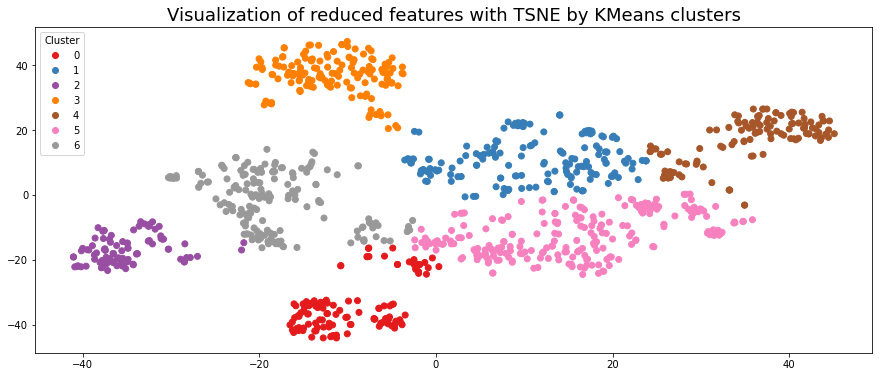

In [82]:
visu_tsne_kmeans(features_bert);

<div style="text-align: justify">
Le cas précédent_les résultats obtenus dans le  paragraphe 3 : 

</div>

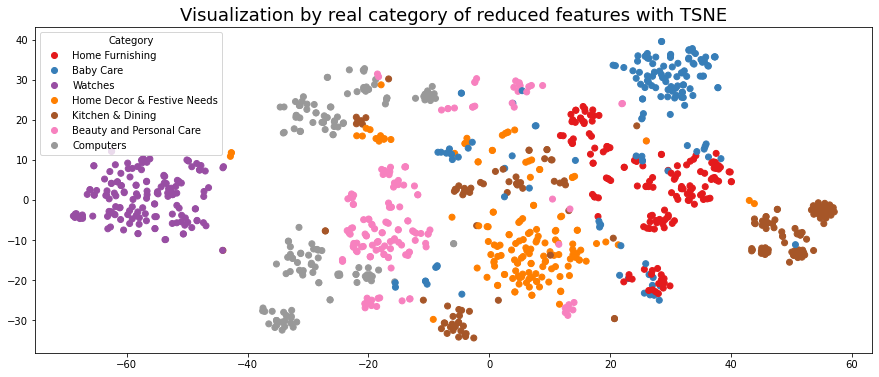

In [103]:
visu_tsne(features)

ARIScore(Category, Clusters) = 0.44


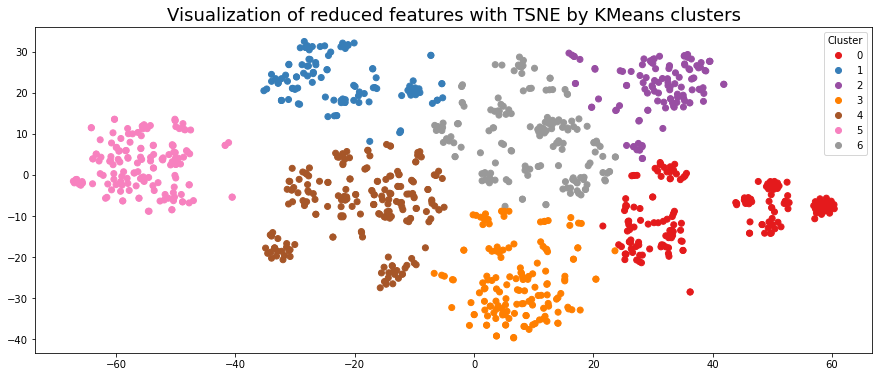

In [104]:
visu_tsne_kmeans(features);

<div style="text-align: justify">
<u>La visualisation par catégorie réelle</u> Pas de différence avec l'approche BERT.<br>
<u>La visualisation par clusters</u> Pas de différence avec l'approche BERT.
</div>

#### - 'cardiffnlp/twitter-roberta-base-sentiment'
* Modèle pré-entraîné sur des tweets pour l'analyse de sentiment = particulièrement adapté au contexte

In [83]:
max_length = 64
batch_size = 10
model_type = 'cardiffnlp/twitter-roberta-base-sentiment'
model = TFAutoModel.from_pretrained(model_type)
sentences = (data['product_name']+data['description']).to_list()

Some layers from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment were not used when initializing TFRobertaModel: ['classifier']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [84]:
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

1/1 [==============================] - 1s 1s/step
temps traitement :  153.0


In [85]:
features_bert.shape

(1050, 768)

<div style="text-align: justify">
 Le cas de l'approche BERT : 

</div>

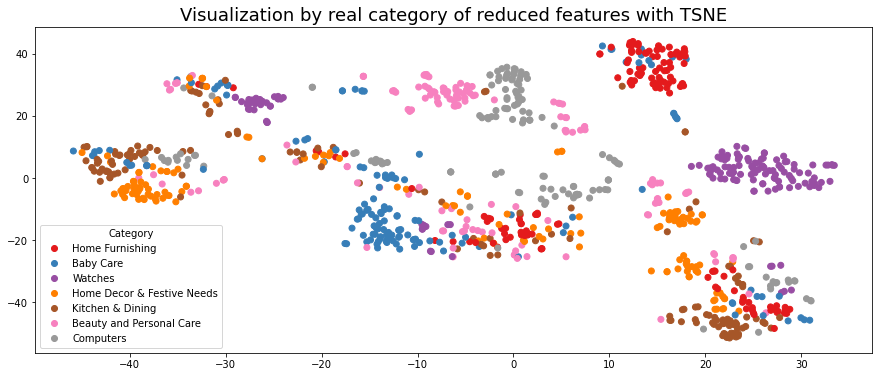

In [86]:
visu_tsne(features_bert)

ARIScore(Category, Clusters) = 0.193


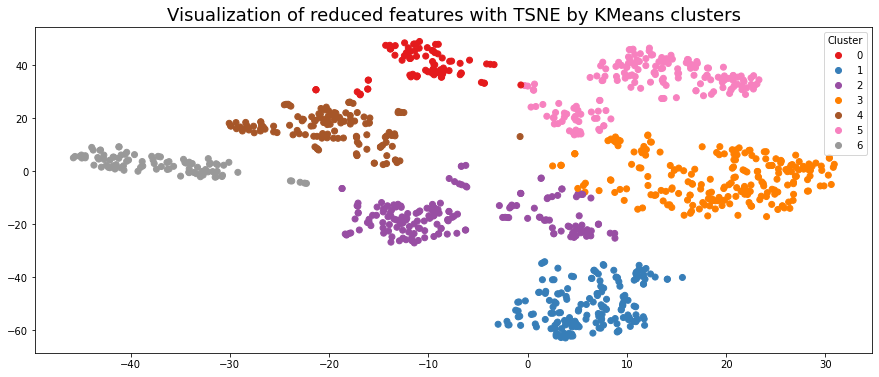

In [87]:
visu_tsne_kmeans(features_bert);

<div style="text-align: justify">
Le cas précédent_les résultats obtenus dans le  paragraphe 3 : 

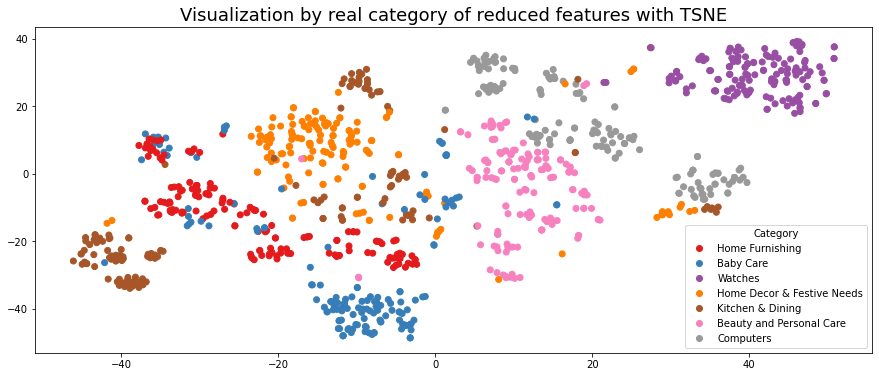

In [105]:
visu_tsne(features)

ARIScore(Category, Clusters) = 0.449


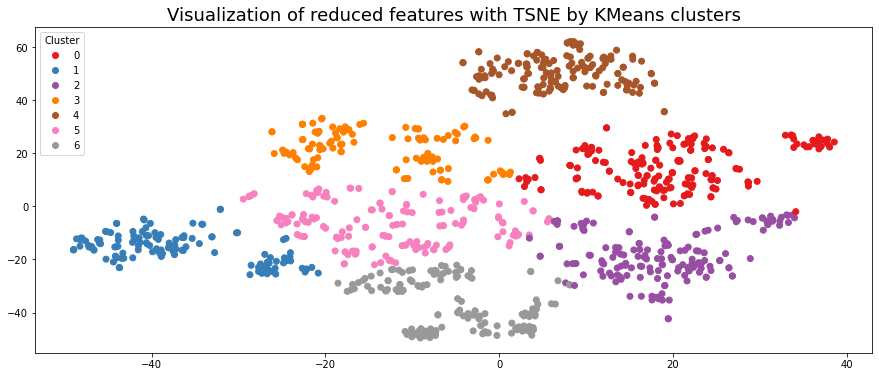

In [106]:
visu_tsne_kmeans(features);

<div style="text-align: justify">
    <u>La visualisation par catégorie réelle</u> Avec l'approche BERT les données ne sont pas bien regroupées.<br>
<u>La visualisation par clusters</u> Avec l'approche BERT ARI score a diminué.
</div>

### <u>BERT hub Tensorflow</u>

In [88]:
# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

In [89]:
sentences = (data['product_name']+data['description']).to_list()

In [90]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='TFhub')

temps traitement :  150.0


<div style="text-align: justify">
 Le cas de l'approche BERT : 

</div>

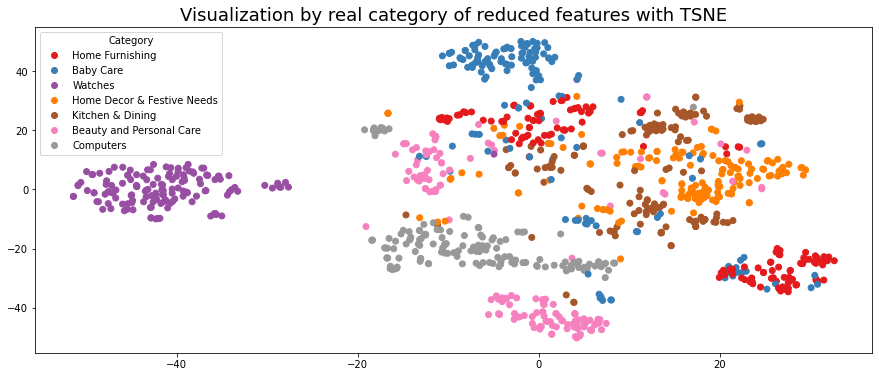

In [91]:
visu_tsne(features_bert)

ARIScore(Category, Clusters) = 0.466


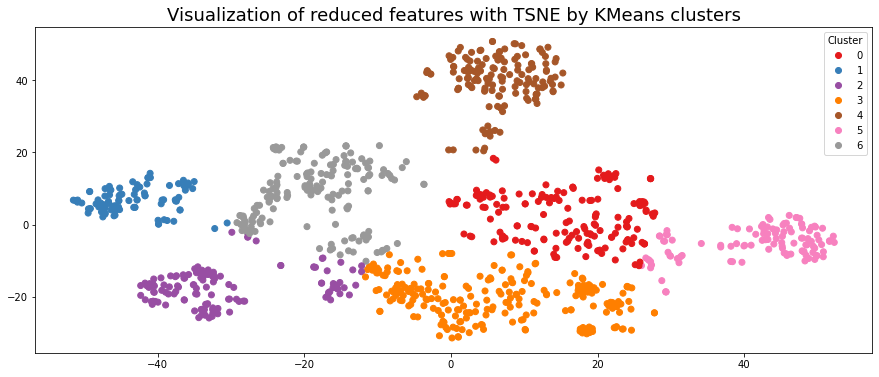

In [92]:
visu_tsne_kmeans(features_bert);

<div style="text-align: justify">
Le cas précédent_les résultats obtenus dans le  paragraphe 3 : 

</div>

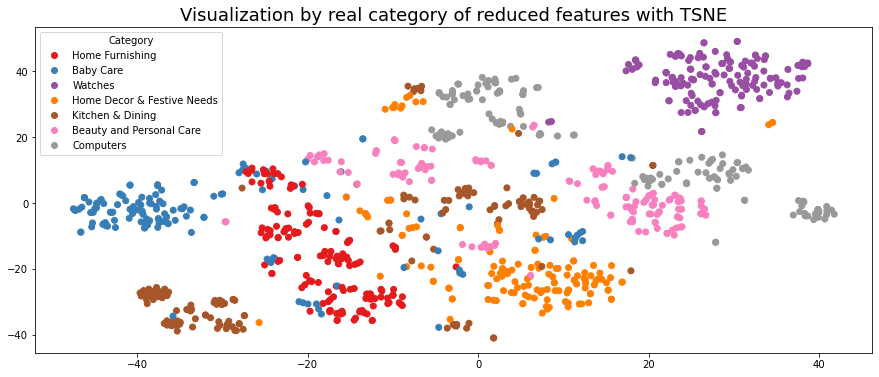

In [107]:
visu_tsne(features)

ARIScore(Category, Clusters) = 0.43


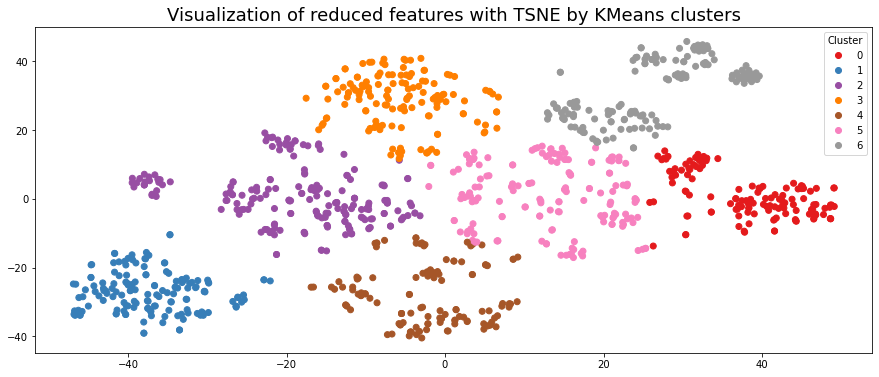

In [108]:
visu_tsne_kmeans(features);

<div style="text-align: justify">
<u>La visualisation par catégorie réelle</u>
    Pas de différence avec l'approche BERT.<br>
<u>La visualisation par clusters</u>
    Pas de différence avec l'approche BERT.
</div>

### <a name ="43">4.3. Text embedding avec le modèle USE</a>

<div style="text-align: justify">
Les étapes suivies sont les étapes proposées par OpenClassroom par le notebook : <a href=  https://s3.eu-west-1.amazonaws.com/course.oc-static.com/projects/Data_Scientist_P6/Exemple_Tweets_Feature-extraction_Sentence+Embedding_V1.1.ipynb > Exemple_Tweets_Feature-extraction_Sentence+Embedding_V1.1 </a>. Le but est d'obtenir la matrice embedding du texte, et l'utiliser pour avoir la visualisation TSNE par catégorie réelle et par cluster.
</div>

###  <u>USE-Universal Sentence Encoder</u>


In [93]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [94]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [95]:
batch_size = 10
sentences = (data['product_name']+data['description']).to_list()

In [96]:
features_USE = feature_USE_fct(sentences, batch_size)

<div style="text-align: justify">
 Le cas de l'approche USE : 

</div>

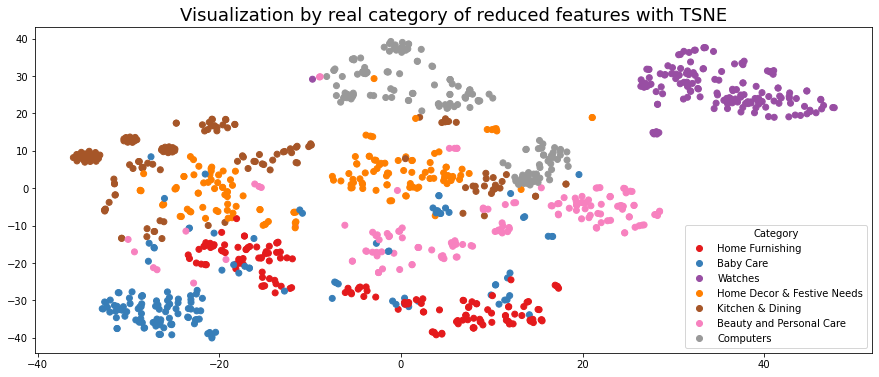

In [97]:
visu_tsne(features_USE)

ARIScore(Category, Clusters) = 0.474


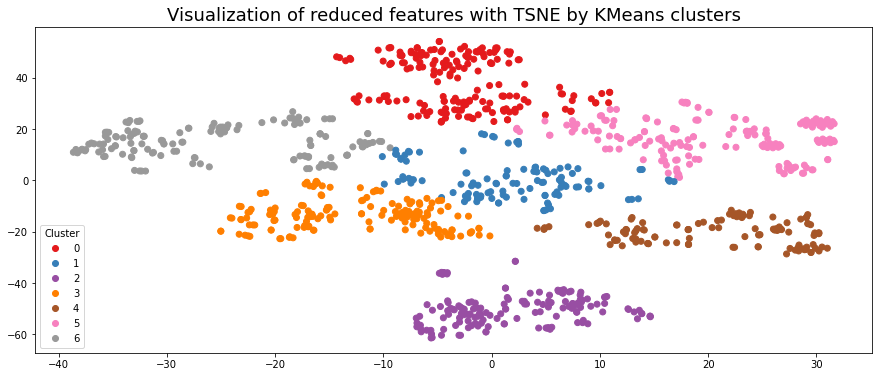

In [98]:
visu_tsne_kmeans(features_USE);

<div style="text-align: justify">
Le cas précédent_les résultats obtenus dans le  paragraphe 3 : 

</div>

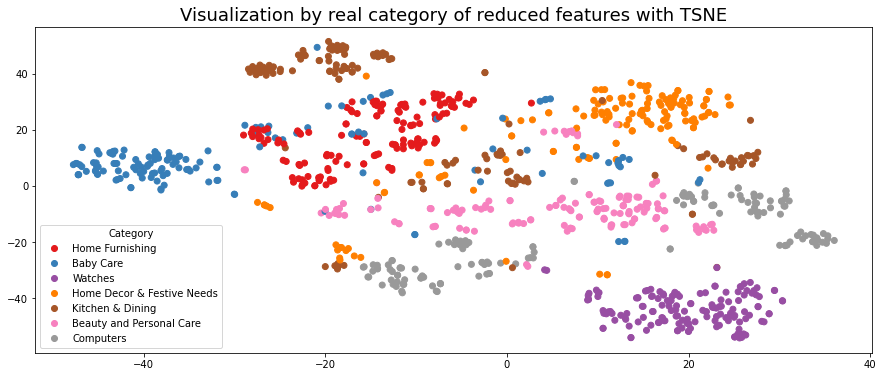

In [110]:
visu_tsne(features)

ARIScore(Category, Clusters) = 0.481


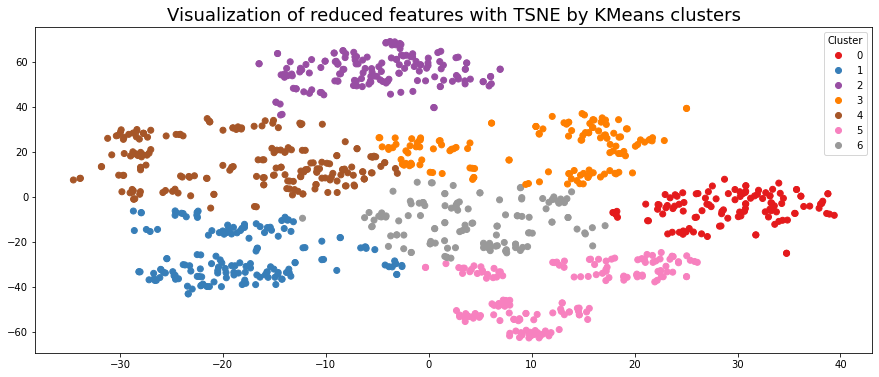

In [111]:
visu_tsne_kmeans(features);

<div style="text-align: justify">
<u>La visualisation par catégorie réelle</u>
    Pas de différence avec l'approche USE.<br>
<u>La visualisation par clusters</u>
    Pas de différence avec l'approche USE.
</div>

## <a name ="5">5. Traitement des images</a>

### <a name ="51">5.1. Avec l'algorithme SIFT</a>

<div style="text-align: justify">
Avec le SIFT, on peut obtenir les descripteurs avec ses keypoints. Avec les descripteurs on obtient les features images. Mais quand l'image est none, on ne peut pas obtenir les descripteurs. Le cas none se produit quand l'image est très petite ou ne contient pas beaucoup de couleurs. La fonction get_feature_sift() donne les features images avec leurs catégories réelles et elle élimine les images none. 
</div>

In [4]:
def get_feature_sift() : 
    '''_Use the function get_feature_sift() to obtain the features of images by the model SIFT_.
    Args:
        None 
        
    Returns:
        df_features_images: _A data frame contains the features of images with theirs real categories_.
    '''
    # Catégories réelles 
    punctuations = ['[', ']', '"']
    real_categories = []
    for sentence in data['product_category_tree']:
        for p in punctuations :
            sentence = sentence.replace(p, ' ')
        real_categories.append(sentence.split('>>')[0].strip())
    
    # features images
    sift = cv2.xfeatures2d.SIFT_create()
    img_no_descriptors = [] # des images qui n'ont pas de descriptors avec la méthode sift
    features_images = []
    i = 0
    for img in data['image'] :
        read_image = cv2.imread('./Flipkart/Images/'+img)
        keypoints, descriptors = sift.detectAndCompute(read_image, None) 
        if descriptors is None :
            img_no_descriptors.append(img)
            real_categories.remove(real_categories[i])
        else :
            features_by_image = pd.DataFrame(descriptors)
            features_images.append(features_by_image.mean(axis=0))
        i += 1
    df_features_images = pd.DataFrame(features_images)
    df_features_images['real_categories'] = real_categories
    
    return df_features_images

In [15]:
df_features_images = get_feature_sift()
df_features_images

0          1          2          3          4          5  \
0     31.991209  19.440306  11.734662  15.476312  29.911802  14.774538   
1     31.096561  24.814463  19.411673  26.761524  33.242954  19.840715   
2     28.577772  21.277071  17.659569  21.011295  32.862762  17.646975   
3     28.321424  23.081970  20.625769  21.673159  22.345797  16.041870   
4     23.492832  23.075640  20.461815  25.573057  35.564041  19.151627   
...         ...        ...        ...        ...        ...        ...   
1044  22.710911  23.569448  26.012066  25.491913  28.549679  14.921951   
1045  19.600000  20.221428  16.851191  15.244047  22.630953  11.365477   
1046  18.276722  17.623934  22.155083  28.052132  35.936394  13.755410   
1047  15.890792  12.209850   7.417559   8.899358  23.430407   7.010706   
1048  18.669973  20.136461  24.597052  22.364611  25.597319  16.551207   

              6          7          8          9  ...        119        120  \
0     11.484125  15.948291  80.352303  35.981651  ...  29.320702  30.523130   
1     14.248929  20.610533  53.684574  34.499195  ...  28.158106  31.306936   
2     13.110231  17.160479  68.660217  34.337444  ...  29.128149  35.050636   
3     13.829601  19.296011  56.444538  30.190500  ...  25.197063  26.466930   
4     12.227458  15.094173  49.008247  35.753929  ...  30.811306  28.932028   
...         ...        ...        ...        ...  ...        ...        ...   
1044  11.496020  12.224647  57.093708  41.166111  ...  30.480103  24.694736   
1045   6.846428   8.265476  71.147621  35.924999  ...  25.386906  25.575001   
1046  10.251147  11.176722  58.249836  39.870819  ...  30.206884  23.409836   
1047   2.100642   5.593148  64.770882  24.817987  ...  25.319057  23.875803   
1048  11.901340  11.126810  54.629223  39.395443  ...  32.592762  25.309114   

            121        122        123        124        125        126  \
0     20.443960  16.848915  21.870110  31.380213  17.898581  13.060308   
1     26.227667  20.198742  26.971624  32.468578  19.207546  12.695932   
2     22.773695  14.493508  14.924825  22.220333  13.959231  13.435342   
3     24.355900  22.727425  23.996250  28.572441  20.129883  16.503593   
4     19.396925  16.538570  20.077412  24.448868  15.890606  13.132013   
...         ...        ...        ...        ...        ...        ...   
1044  17.022850  16.429012  14.589217  15.585879  10.851348  12.574327   
1045  16.607143  13.500000  11.473809  14.351191  10.002381   7.727381   
1046  16.743279  16.474754  17.729507  21.613771  14.339344  11.012131   
1047  13.471092   9.830835   7.967880  12.554604   7.526767   5.214133   
1048  18.908848  16.549866  15.776675  17.619036  11.819035  11.650134   

            127  real_categories  
0     16.535963  Home Furnishing  
1     18.771114        Baby Care  
2     18.181770        Baby Care  
3     18.492033  Home Furnishing  
4     18.911028  Home Furnishing  
...         ...              ...  
1044  13.978691        Baby Care  
1045  10.070238        Baby Care  
1046  14.845246        Baby Care  
1047   6.561028        Baby Care  
1048  15.972654        Baby Care  

[1049 rows x 129 columns]

<div style="text-align: justify">
On peut réduire les composantes de features images avec la fonction transform_features_pca().
</div>

In [10]:
features = transform_features_pca(df_features_images.drop(columns=['real_categories']))
features

PC0        PC1        PC2        PC3        PC4        PC5  \
0    -20.913769 -15.405888  21.532398 -11.195706  -2.855692  13.243928   
1    -81.025261  -0.593324  18.797586 -20.868122   3.603446  12.713150   
2    -21.767944   3.581606   4.602890 -27.734354   9.476300   5.401474   
3    -87.900208 -37.315372   3.183094  -5.585257  -2.085870   4.080348   
4    -73.402763  38.156479  23.081221  -0.227178  -2.841499  -0.463213   
...         ...        ...        ...        ...        ...        ...   
1044 -19.540253  40.779697 -27.606617  -5.117565  -7.900250  -9.121234   
1045  31.521126  15.092772 -17.507158  10.431201   9.141611  -2.671128   
1046 -26.707079  23.272741  -4.966521  -0.972857  -6.449949 -18.851200   
1047  66.806656  43.567188  32.279720  40.154221  42.988758  15.840659   
1048 -36.219452  33.023964 -19.140331   9.849349  -3.565821  -7.176148   

            PC6        PC7        PC8        PC9  
0     -2.615282   2.662205 -25.995142  12.092245  
1    -11.170050   0.327794  -5.975918   3.421630  
2      3.496823 -10.203008  -6.173352   5.686981  
3      3.378783  -9.984680  -7.699736   6.165509  
4     -0.735122  -8.853671  -8.245907  11.261373  
...         ...        ...        ...        ...  
1044  -6.677314   2.783170   1.429417  -0.350899  
1045  -5.120664  -3.388988   0.150675   8.131959  
1046 -13.368139   2.250427   4.604651   3.970704  
1047   5.039861  -7.748269  -1.200780  26.893225  
1048  -0.776547  -3.171396   5.110579   7.030041  

[1049 rows x 10 columns]

<div style="text-align: justify">
La fonction visu_tsne_image() est similaire à la fonction visu_tsne(). Mais mieux adaptés pour les données images, notamment les catégories réelles.
</div>

In [4]:
def visu_tsne_image(features: object):
    '''_Use the function visu_tsne_image() to obtain the visualisation by real category of reduced features with TSNE method_.
    Args:
        features (object, optional): _Put the features which you want to visualise_.   
    
    Returns:
        plt.show(): _A plot of 'Visualization by real category of reduced features with TSNE'_.
    '''    
    model = TSNE(n_components=2, learning_rate='auto', init='random')
    features_tsne = model.fit_transform(features)
    # Catégories codes  
    real_categories_unique = df_features_images['real_categories'].unique()
    categories_codes = pd.Series(range(len(real_categories_unique)), index=real_categories_unique).to_dict()
    real_category_codes = [categories_codes[cat] for cat in df_features_images['real_categories']]

    X0 = features_tsne[:, 0]
    X1 = features_tsne[:, 1]
    categories_labels = list(real_categories_unique)
    fig, ax = plt.subplots(figsize=(15, 6))
    scatter = ax.scatter(X0, X1, c=real_category_codes, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=categories_labels, loc="best", title="Category")
    plt.title('Visualization by real category of reduced features with TSNE', size=18)
    return plt.show()

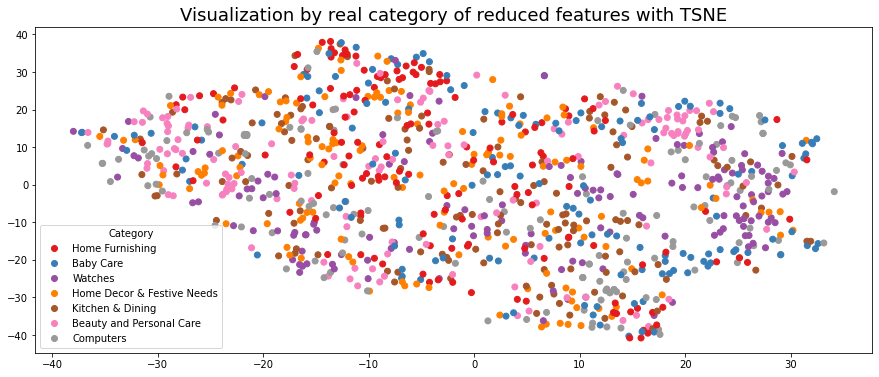

In [11]:
visu_tsne_image(features)

<div style="text-align: justify">
On remarque que les catégories réelles ne sont pas bien séparées.
</div>

<div style="text-align: justify">
La fonction visu_tsne_kmeans_image() est similaire à la fonction visu_tsne_kmeans(). Mais mieux adaptés pour les données images, notamment les catégories réelles.
</div>

In [5]:
def visu_tsne_kmeans_image(features: object):
    '''_Use the function visu_tsne_kmeans_image() to obtain the visualisation by KMeans clusters of reduced features with TSNE 
            method_.
    Args:
        features (object, optional): _Put the feature which you want to visualise_.   
    
    Returns:
        plt.show(): _A plot of 'Visualization by by KMeans clusters of reduced features with TSNE'_.
        print_ari_score: _The ARI score to see the similarity between the real category codes and clusters labels.
    '''
    model = TSNE(n_components=2, learning_rate='auto', init='random')
    features_tsne = model.fit_transform(features)
    # Catégories codes  
    real_categories_unique = df_features_images['real_categories'].unique()
    categories_codes = pd.Series(range(len(real_categories_unique)), index=real_categories_unique).to_dict()
    real_category_codes = [categories_codes[cat] for cat in df_features_images['real_categories']]
   
    # Appliquer le modèle KMeans 
    kmeans = KMeans(n_clusters=len(real_categories_unique)).fit(features_tsne)
    clusters_labels = kmeans.labels_
    clusters_labels_list = list(pd.Series(clusters_labels).sort_values().unique())
    
    X0 = features_tsne[:, 0]
    X1 = features_tsne[:, 1]
    fig, ax = plt.subplots(figsize=(15, 6))
    scatter = ax.scatter(X0, X1, c=clusters_labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=clusters_labels_list, loc="best", title="Cluster")
    plt.title('Visualization of reduced features with TSNE by KMeans clusters', size=18)
    ari_score = adjusted_rand_score(real_category_codes, clusters_labels)
    print_ari_score = print('ARIScore(Category, Clusters) = '+str(round(ari_score, 3)))
    return plt.show(), print_ari_score

ARIScore(Category, Clusters) = 0.028


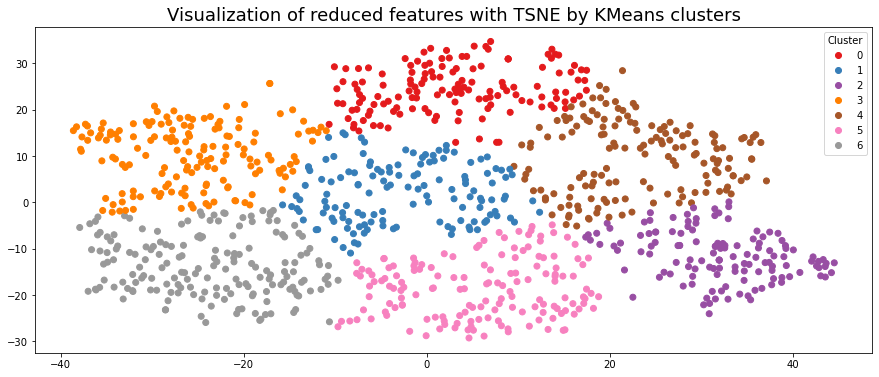

In [14]:
visu_tsne_kmeans_image(features);

<div style="text-align: justify">
A la fin, la classification des images avec la méthode SIFT n'est pas possible avec un mauvais ARI score de 0.028.
</div>

### <a name ="52">5.2. Avec Transfer Learning</a>

<div style="text-align: justify">
Avec le modèle VGG16, On obtient les features images par la fonction model.predict(). Il faut avant préparer l'image pour convenir au format du modèle VGG16. La fonction get_feature_vgg16() donne un dataframe contient les features des images avec leur catégorie réelle.
</div>

In [6]:
def get_feature_vgg16() : 
    '''_Use the function get_feature_VGG16() to obtain the features of images by the model VGG16_.
    Args:
        None 
        
    Returns:
        df_features_images: _A data frame contains the features of images with theirs real categories_.
    '''
    # Catégories réelles 
    punctuations = ['[', ']', '"']
    real_categories = []
    for sentence in data['product_category_tree']:
        for p in punctuations :
            sentence = sentence.replace(p, ' ')
        real_categories.append(sentence.split('>>')[0].strip())
    
    # features images
    # load model
    model = VGG16()
    # remove the output layer
    model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
    features_images = []
    for img in data['image'] :
        # load an image from file
        image = load_img('./Flipkart/Images/'+img, target_size=(224, 224))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # reshape data for the model
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        # prepare the image for the VGG model
        image = preprocess_input(image)
        # get extracted features
        features_images.append(pd.DataFrame(model.predict(image)))
    df_features_images = pd.concat(features_images)
    df_features_images['real_categories'] = real_categories
    return df_features_images

In [7]:
df_features_images = get_feature_vgg16()

1/1 [==============================] - 0s 109ms/step


1/1 [==============================] - 0s 119ms/step


1/1 [==============================] - 0s 114ms/step


C:\Users\wassi\anaconda3\lib\site-packages\PIL\Image.py:2896: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


1/1 [==============================] - 0s 131ms/step


1/1 [==============================] - 0s 130ms/step


In [9]:
df_features_images

0         1         2         3         4         5         6  \
0   3.398615  0.859572  0.000000  1.106561  2.266122  2.927241  2.446448   
0   0.000000  0.000000  0.000000  1.172010  0.000000  0.000000  0.000000   
0   0.000000  0.000000  0.000000  4.457808  0.000000  0.000000  0.000000   
0   0.000000  0.070991  0.000000  2.046283  0.000000  0.000000  0.000000   
0   3.417152  0.000000  0.000000  0.000000  1.012359  0.000000  0.000000   
..       ...       ...       ...       ...       ...       ...       ...   
0   2.312268  2.432936  0.000000  1.860515  3.101231  2.369040  0.000000   
0   1.217184  0.365275  0.330849  0.000000  2.140628  0.000000  0.000000   
0   2.196130  2.398275  2.623641  0.983882  0.366651  0.535506  3.730996   
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.388865  0.000000   
0   0.000000  0.000000  0.123132  0.000000  0.342285  0.000000  0.000000   

           7         8         9  ...  4087      4088      4089      4090  \
0   0.000000  0.000000  0.000000  ...   0.0  0.000000  0.472938  0.875756   
0   0.000000  0.000000  6.499799  ...   0.0  0.000000  0.000000  0.000000   
0   0.000000  0.000000  2.820567  ...   0.0  0.000000  0.000000  0.000000   
0   0.000000  0.000000  0.894023  ...   0.0  0.000000  0.000000  0.000000   
0   0.000000  0.000000  0.000000  ...   0.0  0.000000  0.000000  0.000000   
..       ...       ...       ...  ...   ...       ...       ...       ...   
0   0.000000  1.428848  1.286599  ...   0.0  0.058724  0.000000  0.000000   
0   0.767264  0.000000  3.563398  ...   0.0  0.837411  0.839075  0.000000   
0   0.000000  0.000000  0.000000  ...   0.0  0.000000  0.000000  0.000000   
0   0.000000  0.000000  1.612164  ...   0.0  2.205196  2.729847  0.000000   
0   1.058402  0.000000  3.060778  ...   0.0  0.000000  0.885199  0.000000   

        4091      4092      4093      4094      4095  real_categories  
0   0.783684  0.000000  0.000000  0.851055  0.000000  Home Furnishing  
0   3.152508  0.000000  0.000000  0.000000  0.000000        Baby Care  
0   5.270283  0.000000  1.297100  0.000000  0.000000        Baby Care  
0   3.977747  0.000000  0.000000  0.000000  0.000000  Home Furnishing  
0   9.195914  0.139735  0.000000  1.735951  0.000000  Home Furnishing  
..       ...       ...       ...       ...       ...              ...  
0   0.000000  0.859425  1.085387  0.000000  0.000000        Baby Care  
0   1.042110  0.000000  1.560315  0.000000  0.998342        Baby Care  
0   0.193308  0.546066  2.159872  0.184722  0.000000        Baby Care  
0   0.000000  0.000000  0.000000  0.248330  0.925138        Baby Care  
0   2.335844  0.000000  0.000000  0.527716  2.991749        Baby Care  

[1050 rows x 4097 columns]

<div style="text-align: justify">
On peut réduire les composantes de features images avec la fonction transform_features_pca().
</div>

In [14]:
features = transform_features_pca(df_features_images.drop(columns=['real_categories']))
features

PC0        PC1        PC2        PC3        PC4        PC5  \
0     -5.665052  21.220823   2.122905   2.528062  37.435802 -10.681314   
1      3.485222  37.711819 -30.495905  -2.874249   2.025428 -43.304916   
2     -4.120125  33.633572 -10.051253 -10.470437 -12.944053 -13.593655   
3    -11.230225  24.357254  -7.979777  -0.338173  21.142048 -26.126640   
4    -17.411085  31.597490   3.737273  -1.379837  36.090199 -23.509680   
...         ...        ...        ...        ...        ...        ...   
1045  -3.868872  18.645414   2.402513   2.948897  26.274593  -5.762249   
1046  -7.233921  12.182573   5.876372   0.750218  16.298357  10.902989   
1047 -18.566360  13.841594   3.737403   7.426234  20.817562  -0.390409   
1048 -14.705142   7.613008   5.918900  -2.544384  10.312411   6.057067   
1049  -6.990220  15.146200   5.320806   7.594733  -5.234662   7.928790   

            PC6        PC7        PC8        PC9  
0    -20.255955  -5.880687  -2.399097   2.155319  
1     39.222828  37.131401  33.458340  35.614410  
2      3.513980   3.653056   0.689467   6.319705  
3      9.964937  13.286189  -1.123110  10.978666  
4    -11.194817  11.280734 -10.535845  -8.030317  
...         ...        ...        ...        ...  
1045 -22.067701   4.672604   4.539798  -9.399154  
1046  -8.755384  -0.312777   4.811707   0.113470  
1047  -9.365547  -4.770631   3.623410  -2.126496  
1048   2.259706  -5.366631   5.939667  -7.188815  
1049 -19.992107   1.656697   8.902053  -3.323405  

[1050 rows x 10 columns]

In [15]:
features.shape

(1050, 10)

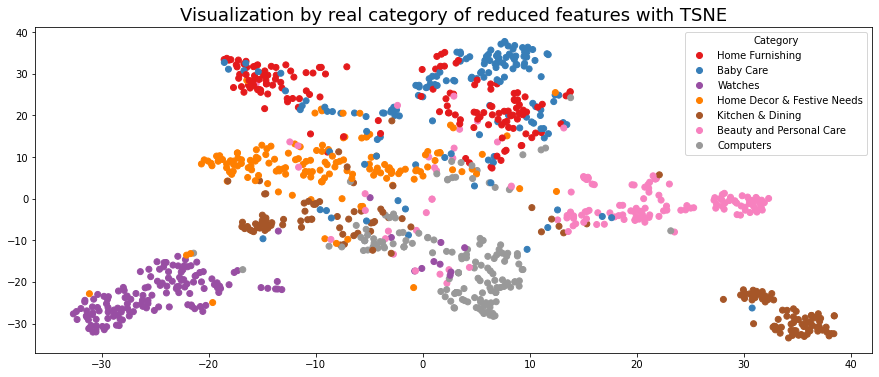

In [60]:
visu_tsne_image(features)

<div style="text-align: justify">
On remarque que les images sont bien regroupées selon les catégories réelles. 
</div>

ARIScore(Category, Clusters) = 0.506


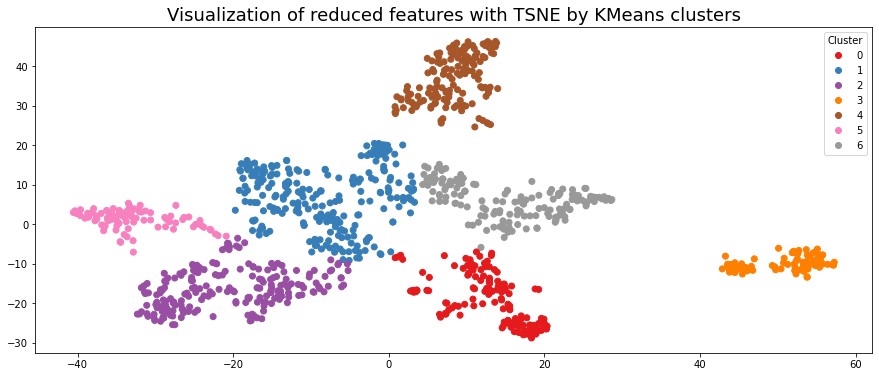

In [62]:
visu_tsne_kmeans_image(features);

<div style="text-align: justify">
Contrairement au modèle SIFT, on a un très bon score ARI de 0.506. De plus, la séparation des images selon la catégorie réelle est beaucoup mieux que le SIFT. Donc, on peut utiliser ce modèle pour la classification des images. 
</div>

## <a name = "c">Conclusion générale</a>

<div style="text-align: justify">
 
</div>

<div style="text-align: justify">
Le projet 6 était spécifiquement pour apprendre le traitement du texte et des images. J'ai appris comment nettoyer le texte et créer des features texte et des images. Aussi comment valider la classification ou non pour ces features. L'idée de réduire les composantes avec ACP ou TSNE était intéressante parce que cela simplifie le travail. Pour le traitement du texte tous les modèles étaient validé à utiliser sauf le modèle Word2Vec. Pour le traitement des images le modèle VGG16 est plus intéressant que le SIFT, parce que le SIFT ne permet pas d'avoir une classification des images. A la fin, pour la formation d'OpenClassroom il reste que deux projets et j'ai bien apprécié tous les projets. Je me sens bien dans la formation jusqu'à projet 6. Et je suis content de continuer pour les deux projets qui restent.
 </div>